In [132]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_diabetes

diabetes = load_diabetes(as_frame=True)
df_x = diabetes.data
df_y = diabetes.target

In [133]:
x = df_x.values
y = df_y.values

In [138]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)

(x_train.shape, y_train.shape), (x_test.shape, y_test.shape)


(((296, 10), (296,)), ((146, 10), (146,)))

In [139]:
w = np.random.rand(10)
b = np.random.rand()

In [140]:
def model(x, w, b):
    predictions = 0
    for i in range(10):
        predictions += x[:, i]* w[i]
    predictions += b
    return predictions

In [141]:
def MSE(a, b):
    mse = ((a - b) ** 2).mean()  
    return mse

def loss(x, w, b, y):
    predictions = model(x, w, b)
    L = MSE(y, predictions)
    return L

In [142]:
def gradient(x, w, b, y):
    N = len(y)
    y_pred = model(x, w, b)
    dw = 2/N * x.T.dot(y_pred - y)
    db = 2 * (y_pred - y).mean()
    return dw, db

In [143]:
LEARNING_RATE = 0.1

losses = []

In [144]:
for i in range(1, 10001):
    dw, db = gradient(x_train, w, b, y_train)
    w -= LEARNING_RATE * dw
    b -= LEARNING_RATE * db
    L = loss(x_train, w, b, y_train)
    losses.append(L)
    if i % 1000 == 0:
        print('Iteration %d : Loss %0.4f' % (i, L))

Iteration 1000 : Loss 3545.1055
Iteration 2000 : Loss 3183.7265
Iteration 3000 : Loss 3060.6420
Iteration 4000 : Loss 3010.5240
Iteration 5000 : Loss 2988.5482
Iteration 6000 : Loss 2978.2545
Iteration 7000 : Loss 2973.1108
Iteration 8000 : Loss 2970.3721
Iteration 9000 : Loss 2968.8187
Iteration 10000 : Loss 2967.8782


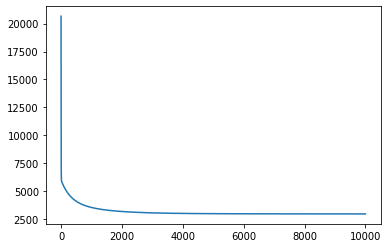

In [145]:
import matplotlib.pyplot as plt
plt.plot(losses)
plt.show()

In [146]:
prediction = model(x_test, w, b)
mse = loss(x_test, w, b, y_test)
mse


2832.576603656798

In [147]:
print("Shape of x_test[:, 0]:", x_test[:, 0].shape)
print("Shape of prediction:", prediction.shape)


Shape of x_test[:, 0]: (146,)
Shape of prediction: (146,)


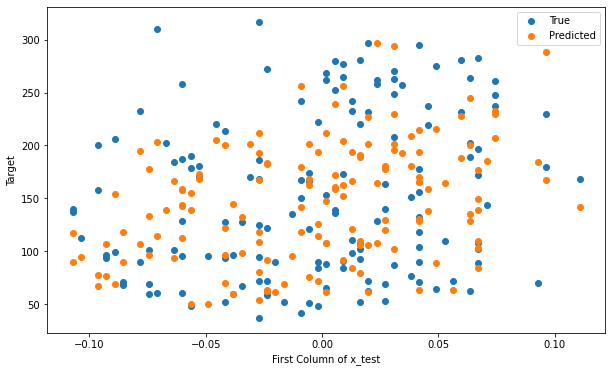

In [148]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))

plt.scatter(x_test[:, 0], y_test, label="True")

plt.scatter(x_test[:, 0], prediction, label="Predicted")

plt.xlabel("First Column of x_test")
plt.ylabel("Target")
plt.legend()
plt.show()



